<a href="https://colab.research.google.com/github/akshita9229/OIBSIP_02/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAME - AKSHITA SHARMA**

# DATA SCIENCE INTERNSHIP @ OASIS INFOBYTE

# TASK 2

# PROJECT NAME - IRIS FLOWER CLASSIFICATION

In [ ]:
from IPython.display import Image
Image(url='https://media.licdn.com/dms/image/D4D12AQG4Xx91-1jncQ/article-cover_image-shrink_600_2000/0/1656075975115?e=2147483647&v=beta&t=S0oEBH0kye4PTVtb1z1Owzpg9afeJDOn2ppGMt5V3Pg', width=950)

Github link - https://github.com/akshita9229/OIBSIP

PROBLEM STATEMENT

Iris flower has 3 species: Setosa, Versicolor and Virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

INPUT:
Sepal Length
Sepal width
Petal length
Petal width

OUTPUT:
Class of Flower

IMPORT MODULES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOADING DATASET

In [5]:
iris = pd.read_csv("/content/Iris.csv")

In [ ]:
# Rename the complex columns name
iris= iris.rename(columns={'SepalLengthCm':'Sepal_Length',
                           'SepalWidthCm':'Sepal_Width',
                           'PetalLengthCm':'Petal_Length',
                           'PetalWidthCm':'Petal_Width'})


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# checking null values
iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
#checking if the data is biased or not
iris ['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
# checking statistical features
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.shape

(150, 6)

# VISUALIZATION

## SCATTERPLOT

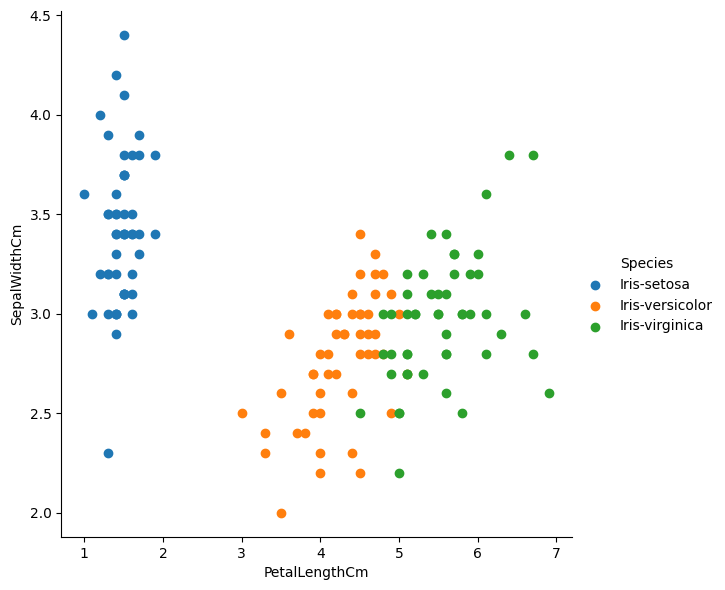

In [ ]:

g = sns.FacetGrid(iris, hue="Species", height=6)
g.map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()
plt.show()


In [ ]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


PAIRPLOT

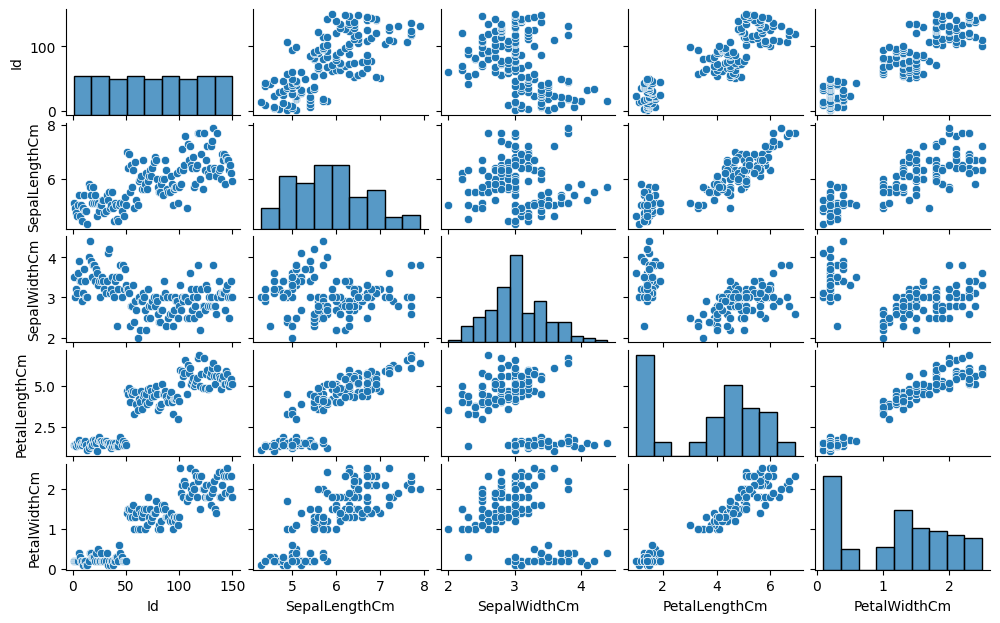

In [ ]:
# visualize the whole
fig1=sns.pairplot(iris)
fig1.fig.set_figheight(6)
fig1.fig.set_figwidth(10)
plt.show()

# SEPARATING INPUT COLUMNS AND OUTPUT COLUMNS

In [ ]:
# Separate features and target
data=iris.values

# slicing the matrices
X=data[:,0:4]
Y=data[:,5]


In [ ]:
print(X.shape)
print(X)

(150, 4)
[[1 5.1 3.5 1.4]
 [2 4.9 3.0 1.4]
 [3 4.7 3.2 1.3]
 [4 4.6 3.1 1.5]
 [5 5.0 3.6 1.4]
 [6 5.4 3.9 1.7]
 [7 4.6 3.4 1.4]
 [8 5.0 3.4 1.5]
 [9 4.4 2.9 1.4]
 [10 4.9 3.1 1.5]
 [11 5.4 3.7 1.5]
 [12 4.8 3.4 1.6]
 [13 4.8 3.0 1.4]
 [14 4.3 3.0 1.1]
 [15 5.8 4.0 1.2]
 [16 5.7 4.4 1.5]
 [17 5.4 3.9 1.3]
 [18 5.1 3.5 1.4]
 [19 5.7 3.8 1.7]
 [20 5.1 3.8 1.5]
 [21 5.4 3.4 1.7]
 [22 5.1 3.7 1.5]
 [23 4.6 3.6 1.0]
 [24 5.1 3.3 1.7]
 [25 4.8 3.4 1.9]
 [26 5.0 3.0 1.6]
 [27 5.0 3.4 1.6]
 [28 5.2 3.5 1.5]
 [29 5.2 3.4 1.4]
 [30 4.7 3.2 1.6]
 [31 4.8 3.1 1.6]
 [32 5.4 3.4 1.5]
 [33 5.2 4.1 1.5]
 [34 5.5 4.2 1.4]
 [35 4.9 3.1 1.5]
 [36 5.0 3.2 1.2]
 [37 5.5 3.5 1.3]
 [38 4.9 3.1 1.5]
 [39 4.4 3.0 1.3]
 [40 5.1 3.4 1.5]
 [41 5.0 3.5 1.3]
 [42 4.5 2.3 1.3]
 [43 4.4 3.2 1.3]
 [44 5.0 3.5 1.6]
 [45 5.1 3.8 1.9]
 [46 4.8 3.0 1.4]
 [47 5.1 3.8 1.6]
 [48 4.6 3.2 1.4]
 [49 5.3 3.7 1.5]
 [50 5.0 3.3 1.4]
 [51 7.0 3.2 4.7]
 [52 6.4 3.2 4.5]
 [53 6.9 3.1 4.9]
 [54 5.5 2.3 4.0]
 [55 6.5 2.8 4.6]
 [56 5.7 2

In [ ]:
print(Y.shape)
print(Y)

(150,)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-ver

# SPLITTING DATA INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_train)

(120, 4)
[[64 6.1 2.9 4.7]
 [115 5.8 2.8 5.1]
 [30 4.7 3.2 1.6]
 [144 6.8 3.2 5.9]
 [42 4.5 2.3 1.3]
 [21 5.4 3.4 1.7]
 [31 4.8 3.1 1.6]
 [87 6.7 3.1 4.7]
 [90 5.5 2.5 4.0]
 [63 6.0 2.2 4.0]
 [73 6.3 2.5 4.9]
 [89 5.6 3.0 4.1]
 [11 5.4 3.7 1.5]
 [135 6.1 2.6 5.6]
 [9 4.4 2.9 1.4]
 [16 5.7 4.4 1.5]
 [61 5.0 2.0 3.5]
 [129 6.4 2.8 5.6]
 [52 6.4 3.2 4.5]
 [39 4.4 3.0 1.3]
 [147 6.3 2.5 5.0]
 [26 5.0 3.0 1.6]
 [133 6.4 2.8 5.6]
 [96 5.7 3.0 4.2]
 [108 7.3 2.9 6.3]
 [15 5.8 4.0 1.2]
 [117 6.5 3.0 5.5]
 [23 4.6 3.6 1.0]
 [41 5.0 3.5 1.3]
 [69 6.2 2.2 4.5]
 [44 5.0 3.5 1.6]
 [14 4.3 3.0 1.1]
 [131 7.4 2.8 6.1]
 [134 6.3 2.8 5.1]
 [120 6.0 2.2 5.0]
 [43 4.4 3.2 1.3]
 [68 5.8 2.7 4.1]
 [12 4.8 3.4 1.6]
 [103 7.1 3.0 5.9]
 [94 5.0 2.3 3.3]
 [33 5.2 4.1 1.5]
 [71 5.9 3.2 4.8]
 [4 4.6 3.1 1.5]
 [18 5.1 3.5 1.4]
 [59 6.6 2.9 4.6]
 [37 5.5 3.5 1.3]
 [141 6.7 3.1 5.6]
 [49 5.3 3.7 1.5]
 [84 6.0 2.7 5.1]
 [47 5.1 3.8 1.6]
 [105 6.5 3.0 5.8]
 [82 5.5 2.4 3.7]
 [2 4.9 3.0 1.4]
 [24 5.1 3.3 1.7]
 [22 5.1

In [ ]:
print(y_test.shape)
print(y_test)

(30,)
['Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor']


In [ ]:
print(X_test.shape)
print(X_test)

(30, 4)
[[32 5.4 3.4 1.5]
 [112 6.4 2.7 5.3]
 [143 5.8 2.7 5.1]
 [51 7.0 3.2 4.7]
 [92 6.1 3.0 4.6]
 [91 5.5 2.6 4.4]
 [20 5.1 3.8 1.5]
 [146 6.7 3.0 5.2]
 [121 6.9 3.2 5.7]
 [38 4.9 3.1 1.5]
 [124 6.3 2.7 4.9]
 [137 6.3 3.4 5.6]
 [123 7.7 2.8 6.7]
 [98 6.2 2.9 4.3]
 [88 6.3 2.3 4.4]
 [111 6.5 3.2 5.1]
 [29 5.2 3.4 1.4]
 [145 6.7 3.3 5.7]
 [75 6.4 2.9 4.3]
 [66 6.7 3.1 4.4]
 [6 5.4 3.9 1.7]
 [136 7.7 3.0 6.1]
 [113 6.8 3.0 5.5]
 [118 7.7 3.8 6.7]
 [34 5.5 4.2 1.4]
 [13 4.8 3.0 1.4]
 [77 6.8 2.8 4.8]
 [10 4.9 3.1 1.5]
 [65 5.6 2.9 3.6]
 [78 6.7 3.0 5.0]]


In [ ]:
print(y_train.shape)
print(y_train)

(120,)
['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iri

### *MODEL NO. 1 -SUPPORT VECTOR MACHINE ALGORITHM*

In [ ]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_train,y_train)

SVC()

In [ ]:
prediction1 = model_svc.predict(X_test)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction1))

1.0


# *MODEL NO. 2 - LOGISTIC REGRESSION*

In [ ]:
# converting categorical variables into numbers
flower_mapping = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
iris['Species']=iris['Species'].map(flower_mapping)

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [ ]:
# preparing inputs and outputs
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values # Changed tuple to a list
y = iris[['Species']].values

In [ ]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [ ]:
model.score(X,Y)

0.9733333333333334

In [ ]:
expected = Y
predicted = model.predict(X)
predicted

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
# summarise the fit of the model
from sklearn import metrics

In [ ]:
print(metrics.classification_report(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [ ]:
# confusion metrics
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


# *MODEL NO. 3 - DECISION TREE CLASSIFIER*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
prediction3= model_svc.predict(X_test)

#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction3))

1.0


# *NEW DATA FOR PREDICTION*

In [ ]:
# new data for prediction
X_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])

# Predicting the sizes of the iris flowers
predicted_sizes = model.predict(X_new)

# Output the predicted sizes
print(predicted_sizes)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


setosa -> 0
versicolor -> 1
virginica ->2